In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.contrib import learn
import numpy as np
from matplotlib import pyplot as plt
tf.logging.set_verbosity(tf.logging.ERROR)  # 只输出 Error 信息

In [2]:
DATAFILE = './data.csv'
dataset = tf.contrib.learn.datasets.base.load_csv_without_header(
    filename=DATAFILE,
    target_dtype=np.int,
    features_dtype=np.float32)

features = [tf.contrib.layers.real_valued_column("", dimension=2)]

In [27]:
# 定义模型和损失函数
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([2, 1]), name='W', dtype=tf.float32)
b = tf.Variable([0.], name='b', dtype=tf.float32)
logi1 = tf.sigmoid(tf.matmul(x, W) + b)
loss_logi1 = tf.losses.sigmoid_cross_entropy(y, logi1)

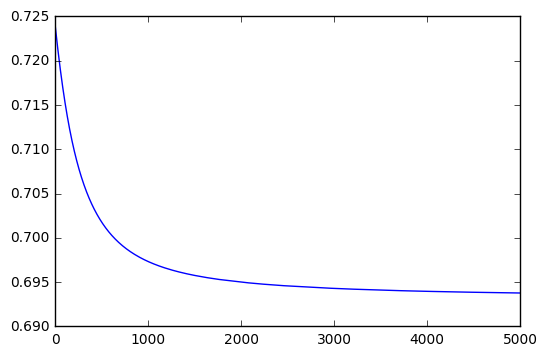

In [28]:
# 训练
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss_logi1)
size = dataset.target.shape[0]
labels = dataset.target.reshape(size, 1)
feed = {x: dataset.data, y: labels}

losses_logi1 = []
for i in range(5000):
    sess.run(train, feed)
    losses_logi1.append(sess.run(loss_logi1, feed))

plt.plot(losses_logi1);

In [29]:
def accuracy(preds, labels):
    return ((preds > 0.5) == labels).sum() / float(len(labels))

# logi1 在训练集上的准确率
preds = sess.run(logi1, feed)
accuracy(preds, labels)

0.5

In [18]:
data = []
with open('./data.csv', 'r') as f:
    for line in f.readlines():
        data.append(line.strip().split(','))

In [19]:
X_train = []
y_train = []
for i in range(len(data)):
    X_train.append((float(data[i][0]), float(data[i][1])))
    y_train.append(int(data[i][2]))

In [20]:
xtrain = np.array(X_train).reshape(2, 200)
ytrain = np.array(y_train).reshape(1, 200)

In [30]:
# 定义模型和损失函数 
# x、y 定义同 1.1 节
num_units = 4  # 隐层节点数

# 输入层 -> 隐层 参数
W1 = tf.Variable(tf.random_uniform([2, num_units]), name='W1', dtype=tf.float32)
b1 = tf.Variable(tf.random_uniform([num_units]), name='b1', dtype=tf.float32)

# 隐层 -> 输出层 参数
W2 = tf.Variable(tf.random_uniform([num_units, 1]), name='W1', dtype=tf.float32)
b2 = tf.Variable(tf.random_uniform([1]), name='b2', dtype=tf.float32)

hidden = tf.tanh(tf.matmul(x, W1) + b1)
nn = tf.sigmoid(tf.matmul(hidden, W2) + b2)
loss_nn = tf.losses.sigmoid_cross_entropy(y, nn)

In [24]:
x_placeholder = tf.placeholder('float')
y_placeholder = tf.placeholder('float')

0.645
0.5
0.56
0.89
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


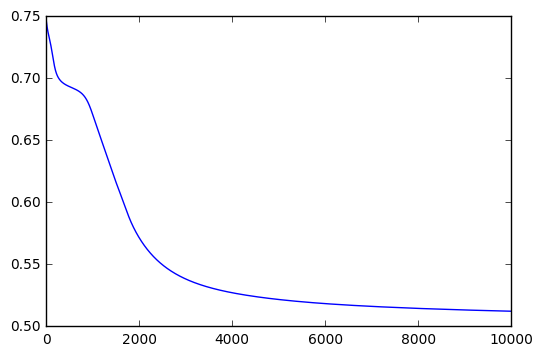

In [35]:
# 训练
sess = tf.Session()
sess.run(tf.global_variables_initializer())
train = tf.train.GradientDescentOptimizer(0.3).minimize(loss_nn)
losses_nn = []
for i in range(10000):
    #feed_dict = {x_placeholder:xtrain.astype(float), y_placeholder:ytrain.astype(float)}
    sess.run(train, feed)
    losses_nn.append(sess.run(loss_nn, feed))
    if i % 500 == 0:
        preds = sess.run(nn, feed)
        print(accuracy(preds, labels))

plt.plot(losses_nn);

In [33]:
# nn 在训练集上的准确率
preds = sess.run(nn, feed)
accuracy(preds, labels)

0.995